In [5]:
cd C:\Users\PC\Desktop\dataIncubator\Project

C:\Users\PC\Desktop\dataIncubator\Project


In [6]:
pwd

'C:\\Users\\PC\\Desktop\\dataIncubator\\Project'

In [264]:
import pandas as pd

In [265]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline

In [11]:
data = pd.read_csv('temp_datalab_records_linkedin_company.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
data.columns

Index(['dataset_id', 'as_of_date', 'company_name', 'followers_count',
       'employees_on_platform', 'link', 'industry', 'date_added',
       'date_updated', 'description', 'website', 'entity_id', 'cusip', 'isin'],
      dtype='object')

In [ ]:
# data['industry'];

In [17]:
data.groupby('industry')['date_added'].count()

industry
Accounting                                1553
Airlines/Aviation                        20063
Apparel & Fashion                        16573
Apparel &amp; Fashion                     1221
Automotive                               49154
Aviation & Aerospace                     18332
Aviation &amp; Aerospace                  1049
Banking                                 168364
Biotechnology                           152710
Broadcast Media                           6905
Building Materials                       24211
Business Supplies and Equipment           5307
Capital Markets                           1524
Chemicals                                35177
Civil Engineering                         3005
Commercial Real Estate                   14376
Computer & Network Security               7018
Computer &amp; Network Security            463
Computer Games                            3936
Computer Hardware                         7972
Computer Networking                       7582
Comp

In [18]:
groupData = data.groupby('industry')['date_added'].count()

In [58]:
groupData.sort_values()

industry
Gambling &amp; Casinos                      31
Professional Training &amp; Coaching        47
Individual &amp; Family Services            56
Program Development                         93
Military                                    94
Photography                                 94
Glass, Ceramics &amp; Concrete             116
Venture Capital &amp; Private Equity       136
Market Research                            148
Graphic Design                             187
Ranching                                   187
Law Practice                               190
Luxury Goods &amp; Jewelry                 205
International Trade and Development        206
Medical Practice                           281
Nonprofit Organization Management          281
Paper &amp; Forest Products                368
Leisure, Travel &amp; Tourism              372
Computer &amp; Network Security            463
Fine Art                                   467
Renewables &amp; Environment               481
Ware

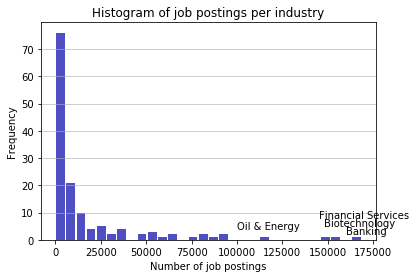

In [119]:
n, bins, patches = plt.hist(groupData, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of job postings')
plt.ylabel('Frequency')
plt.title('Histogram of job postings per industry')
plt.text(160000, 2, r'Banking')
plt.text(148000, 5, r'Biotechnology')
plt.text(145000, 8, r'Financial Services')
plt.text(100000, 4, r'Oil & Energy')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [192]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [198]:
data['date_added']

0         2015-09-14 00:00:00.000000
1         2015-09-15 00:00:00.000000
2         2015-09-16 00:00:00.000000
3         2015-09-16 00:00:00.000000
4         2015-09-16 00:00:00.000000
5         2015-09-16 00:00:00.000000
6         2015-09-16 00:00:00.000000
7         2015-09-16 00:00:00.000000
8         2015-09-16 00:00:00.000000
9         2015-09-16 00:00:00.000000
10        2015-09-16 00:00:00.000000
11        2015-09-16 00:00:00.000000
12        2015-09-16 00:00:00.000000
13        2015-09-16 00:00:00.000000
14        2015-09-16 00:00:00.000000
15        2015-09-16 00:00:00.000000
16        2015-09-16 00:00:00.000000
17        2015-09-16 00:00:00.000000
18        2015-09-16 00:00:00.000000
19        2015-09-16 00:00:00.000000
20        2015-09-16 00:00:00.000000
21        2015-09-16 00:00:00.000000
22        2015-09-16 00:00:00.000000
23        2015-09-16 00:00:00.000000
24        2015-09-16 00:00:00.000000
25        2015-09-16 00:00:00.000000
26        2015-09-16 00:00:00.000000
2

In [202]:
data['year']=pd.DatetimeIndex(data['date_added']).year

In [203]:
mask = data['year']==2016

In [205]:
dataf1 = data[mask]

In [206]:
mask = dataf1['industry']=='Banking'

In [207]:
dataf2 = dataf1[mask]

In [237]:
a=dataf2.groupby('company_name').count()['date_added']

In [235]:
b=dataf2.groupby('company_name')['employees_on_platform'].mean()

In [239]:
c=(a/b)

In [241]:
c

company_name
1st Security Bank of Washington                        0.005405
1st Source Bank                                        0.049065
ACNB Bank                                              0.270093
Access National Bank                                   0.229573
Alliance Association Bank                              2.868421
Alliance Bank of Arizona                               0.620807
AmTrust Bank, A Division of New York Community Bank    0.340457
AmeriServ Financial Bank                               0.150527
American River Bank                                    0.344030
American Savings Bank                                  0.135153
Ameris Bank                                            0.056488
Anchor Bank WA                                         0.453076
Arizona Bank & Trust                                   0.236372
Arizona Bank &amp; Trust                               0.178218
AuburnBank                                             0.355415
BBCN Bank                  

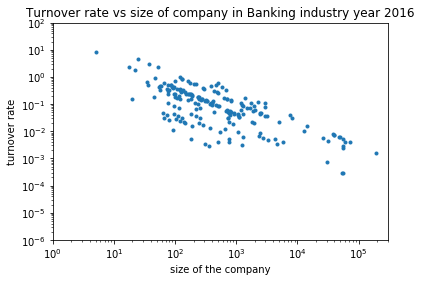

In [302]:
plt.loglog(b,c,'.'); plt.ylim(1e-6, 100); plt.xlim(1,3e5); 
plt.xlabel('size of the company'); 
plt.ylabel('turnover rate'); 
plt.title('Turnover rate vs size of company in Banking industry year 2016')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     244.6
Date:                Sun, 28 Oct 2018   Prob (F-statistic):           1.52e-36
Time:                        12:19:42   Log-Likelihood:                -320.15
No. Observations:                 202   AIC:                             644.3
Df Residuals:                     200   BIC:                             650.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.64

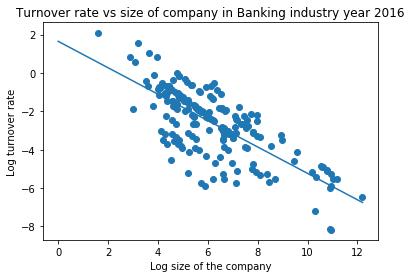

In [307]:
import statsmodels.api as sm

X = np.log(b)
Y = np.log(c)

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.log(np.linspace(1,2e5,100))
plt.plot(X_plot, (X_plot)*results.params[1] + results.params[0])

plt.xlabel('Log size of the company'); 
plt.ylabel('Log turnover rate'); 
plt.title('Turnover rate vs size of company in Banking industry year 2016')

plt.show()